In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:08<00:00, 90.8MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s] 


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 109ms/step - loss: 1.0594 - accuracy: 0.6045 - val_loss: 0.6830 - val_accuracy: 0.6432
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5372 - accuracy: 0.7281 - val_loss: 0.6008 - val_accuracy: 0.7052
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4491 - accuracy: 0.7919 - val_loss: 0.5424 - val_accuracy: 0.7474
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3880 - accuracy: 0.8267 - val_loss: 0.4737 - val_accuracy: 0.7762
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3094 - accuracy: 0.8650 - val_loss: 0.4405 - val_accuracy: 0.8106
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2319 - accuracy: 0.9050 - val_loss: 0.4287 - val_accuracy: 0.8232
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1593 - accuracy: 0.9366 - val_loss: 1.8054 - val_ac

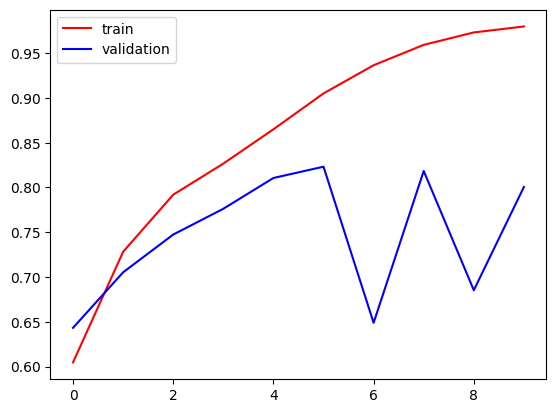

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

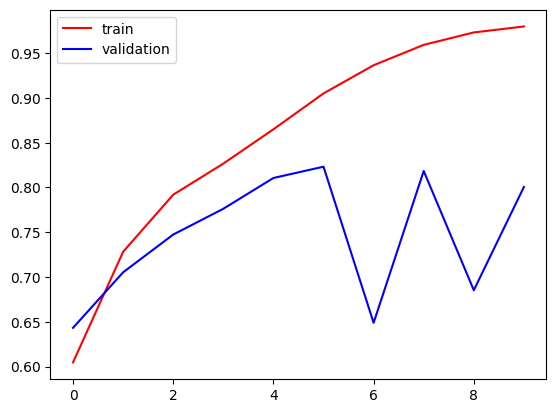

In [17]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

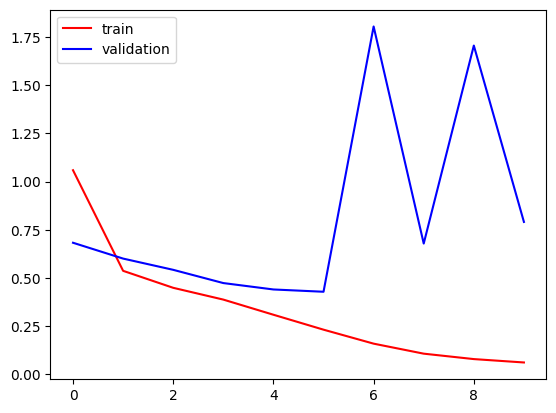

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

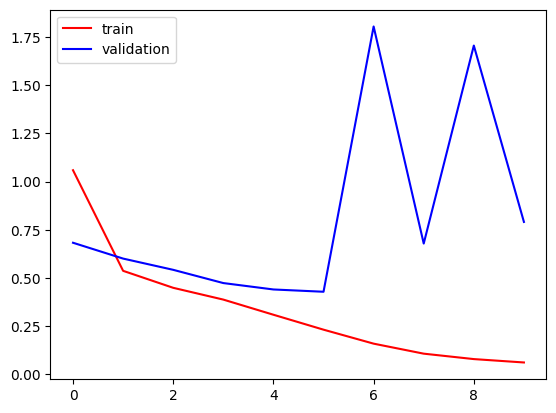

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

In [23]:
test_img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10000.jpg')

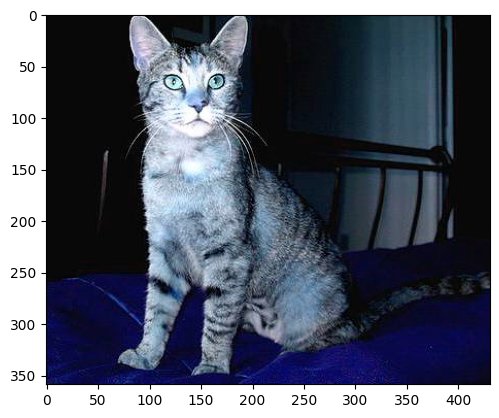

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(359, 431, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 388ms/step


array([[1.]], dtype=float32)

In [30]:
from tensorflow import keras
model.save('cat_dog_classifier_model.keras')

print("Model saved successfully.")


Model saved successfully.


In [32]:
import matplotlib
matplotlib.use('Agg')  #  Agg backend (non-interactive) for Matplotlib


In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib
matplotlib.use('Agg')

# Load the trained model
model = keras.models.load_model('/content/cat_dog_classifier_model.keras')


# Function to classify an image
def classify_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    img = np.reshape(img, (1, 256, 256, 3))
    img = img / 255.0  # Normalize the image
    prediction = model.predict(img)
    if prediction[0][0] > 0.5:
        return "Dog"
    else:
        return "Cat"

# Function to open file dialog and get image path
def open_file_dialog():
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])
    if file_path:
        display_image(file_path)
        result_label.config(text=f"Prediction: {classify_image(file_path)}")

# Function to display the selected image in the GUI
def display_image(image_path):
    img = Image.open(image_path)
    img = img.resize((250, 250), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    image_label.config(image=img)
    image_label.image = img

# Create the main window
root = tk.Tk()
root.title("Cat vs Dog Classifier")

# Create GUI components
open_button = tk.Button(root, text="Open Image", command=open_file_dialog)
result_label = tk.Label(root, text="Prediction: ")
image_label = tk.Label(root)

# Arrange GUI components
open_button.pack(pady=10)
image_label.pack(pady=10)
result_label.pack(pady=10)

# Start the GUI main loop
root.mainloop()
